In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   SD1                369289 non-null  float64
 10  SD2                369289 non-null  float64
 11  KURT               369289 non-null  float64
 12  SKEW               369289 non-null  float64
 13  MEAN_REL_RR        369289 non-null  float64
 14  MEDIAN_REL_RR      369289 non-null  float64
 15  SDRR_REL_RR        369289 non-null  float64
 16  RM

In [4]:
# Feature Selection: Selecting HRV features based on correlation analysis from the article
selected_features = ["HR", "RMSSD", "pNN50", "TP", "VLF"]  

# Encoding the target variable ("condition") to numerical values
label_encoder = LabelEncoder()
train_df["condition"] = label_encoder.fit_transform(train_df["condition"])
test_df["condition"] = label_encoder.transform(test_df["condition"])

In [5]:
spearman_corr_selected = train_df[selected_features + ["condition"]].corr(method='spearman')["condition"].drop("condition").sort_values(ascending=False)
print("\n📊 Spearman Correlation with Target:\n", spearman_corr_selected)


📊 Spearman Correlation with Target:
 VLF      0.125479
TP       0.033172
pNN50   -0.015387
RMSSD   -0.101696
HR      -0.106941
Name: condition, dtype: float64


In [6]:
X_train = train_df[selected_features]
y_train = train_df["condition"]

X_test = test_df[selected_features]
y_test = test_df["condition"]

# Normalize the feature values (Logistic Regression is sensitive to scale)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


✅ Logistic Regression Model Performance:
Accuracy: 0.6221334048205103
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.32      0.42     11782
           1       0.63      0.91      0.74     22158
           2       0.55      0.25      0.34      7093

    accuracy                           0.62     41033
   macro avg       0.60      0.49      0.50     41033
weighted avg       0.61      0.62      0.58     41033



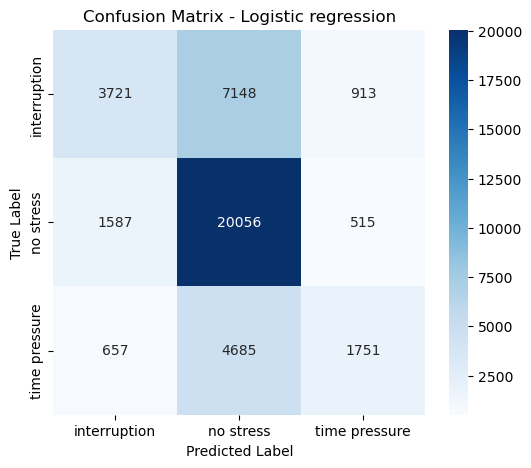

In [7]:
# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_test_pred_lg = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred_lg)

# Evaluate model performance
print("\n✅ Logistic Regression Model Performance:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_test_pred_lg))

# Compute the confusion matrix
cm_lg = confusion_matrix(y_test, y_test_pred_lg)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lg, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic regression")
plt.show()


✅ Random Forest Model Performance:
Accuracy: 0.7249774571686204
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.54      0.65     11782
           1       0.70      0.95      0.81     22158
           2       0.69      0.33      0.45      7093

    accuracy                           0.72     41033
   macro avg       0.74      0.61      0.64     41033
weighted avg       0.74      0.72      0.70     41033



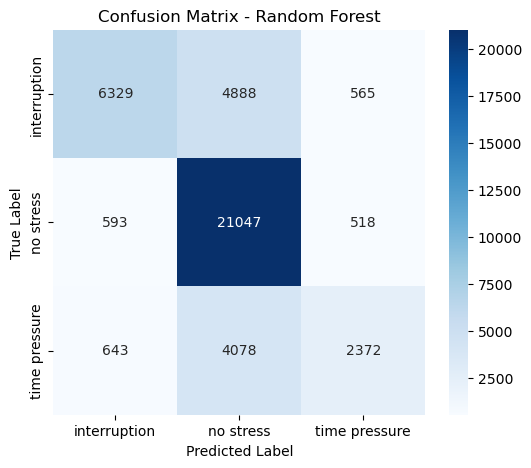

In [9]:
# Train Random Forest Classifier**
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=5)  # Adjust n_estimators if needed
rf_model.fit(X_train, y_train)

# Evaluate Model Performance**
y_test_pred_RF = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred_RF)

print("\n✅ Random Forest Model Performance:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_test_pred_RF))

# Compute the confusion matrix
cm_RF = confusion_matrix(y_test, y_test_pred_RF)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_RF, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

/Users/teeteam/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:07:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ XGBoost Model Performance:
Accuracy: 0.8952306679989277
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88     11782
           1       0.88      0.96      0.92     22158
           2       0.90      0.81      0.85      7093

    accuracy                           0.90     41033
   macro avg       0.90      0.87      0.88     41033
weighted avg       0.90      0.90      0.89     41033



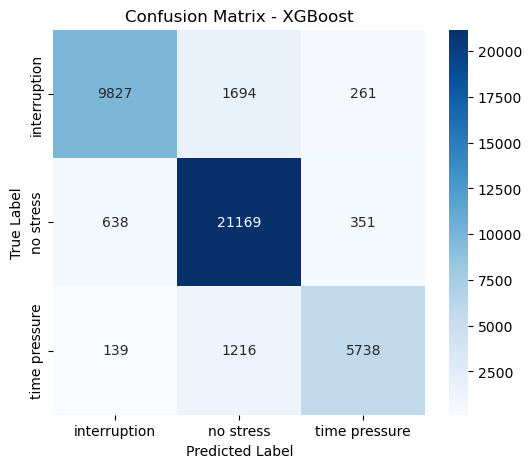

In [8]:
# Train XGBoost Classifier**
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric="mlogloss")
xgb_model.fit(X_train, y_train)

# Evaluate Model Performance**
y_test_pred_xg = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred_xg)

print("\n✅ XGBoost Model Performance:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_test_pred_xg))


# Compute the confusion matrix
cm_xg = confusion_matrix(y_test, y_test_pred_xg)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xg, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()


/var/folders/9q/z6kf2qdx04x0zh267qrsj6vh0000gn/T/ipykernel_54758/2342526072.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Class", y="Probability", data=prediction_probabilities, palette="coolwarm", ax=axes[3])


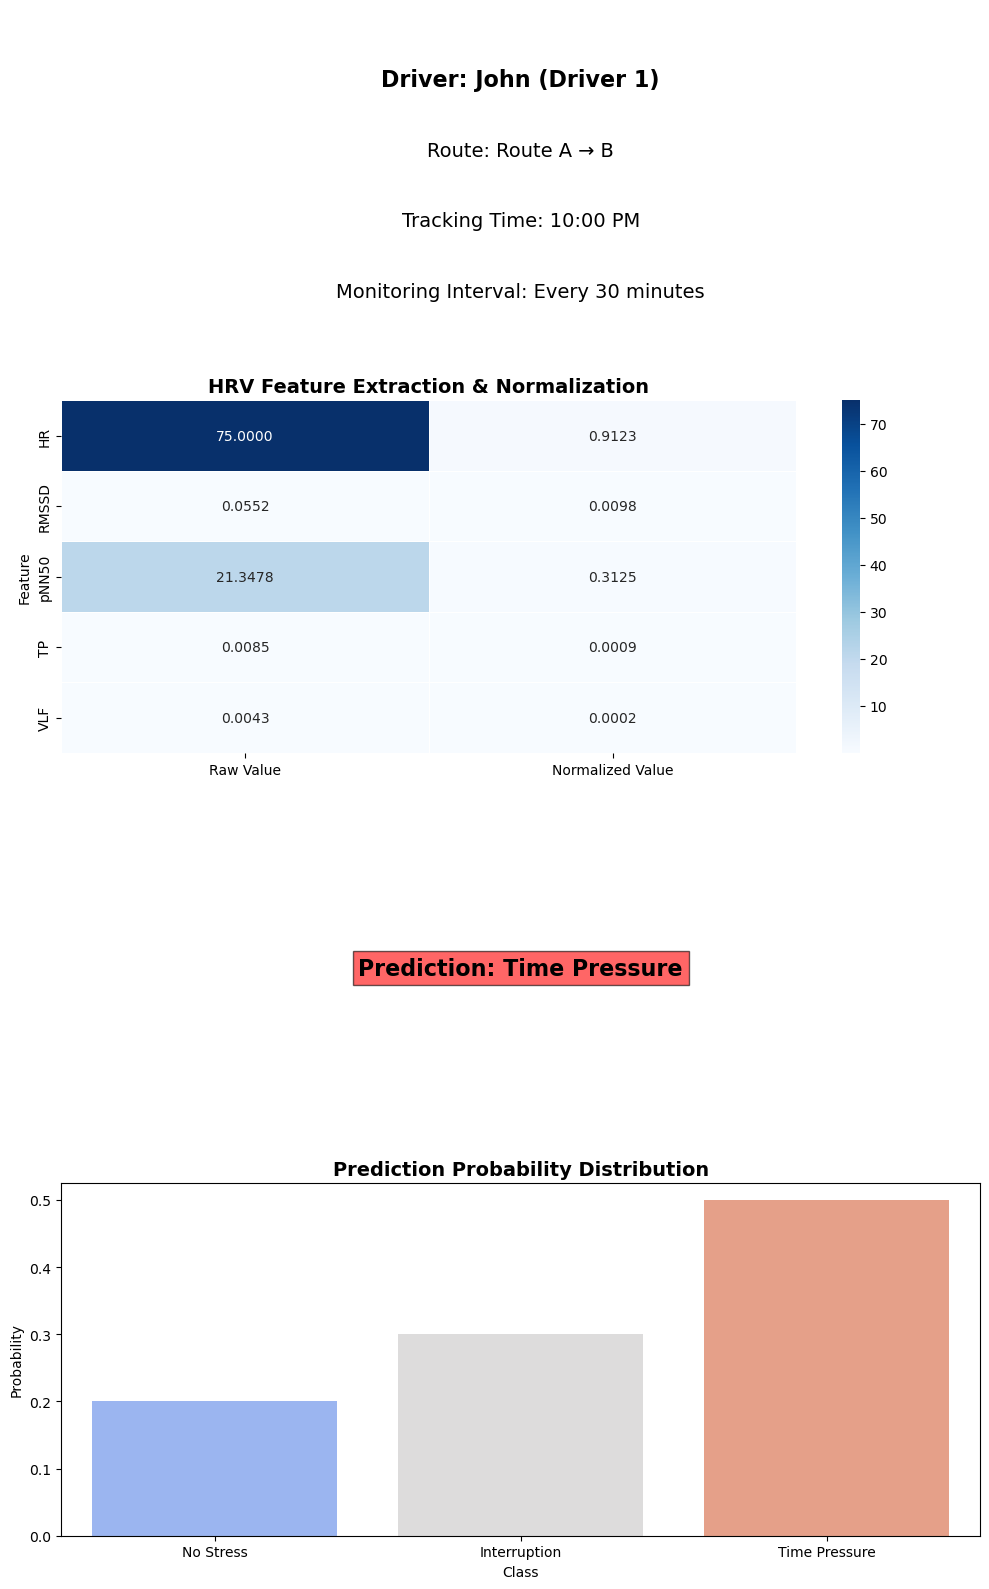

In [14]:
# Example driver information and tracking time
driver_name = "John (Driver 1)"
route = "Route A → B"
tracking_time = "10:00 PM"
tracking_interval = "Every 30 minutes"

# Simulated HRV feature input data (matching dataset feature selection)
hrv_data = pd.DataFrame({
    "Feature": ["HR", "RMSSD", "pNN50", "TP", "VLF"],
    "Raw Value": [75, 0.0552, 21.3478, 0.0085, 0.0043],
    "Normalized Value": [0.9123, 0.0098, 0.3125, 0.0009, 0.0002]
})

# Simulated stress detection scenario (matching "condition" variable)
prediction = "Time Pressure"  # Aligning with dataset target variable
prediction_probabilities = pd.DataFrame({
    "Class": ["No Stress", "Interruption", "Time Pressure"],
    "Probability": [0.20, 0.30, 0.50]  # Higher probability for "Time Pressure"
})

# Set up visualization for presentation
fig, axes = plt.subplots(4, 1, figsize=(10, 16))

# Driver Information for Presentation
axes[0].text(0.5, 0.8, f"Driver: {driver_name}", fontsize=16, fontweight='bold', ha='center', va='center')
axes[0].text(0.5, 0.6, f"Route: {route}", fontsize=14, ha='center', va='center')
axes[0].text(0.5, 0.4, f"Tracking Time: {tracking_time}", fontsize=14, ha='center', va='center')
axes[0].text(0.5, 0.2, f"Monitoring Interval: {tracking_interval}", fontsize=14, ha='center', va='center')
axes[0].axis("off")

# HRV Feature Visualization (Matching notebook-selected features)
sns.heatmap(hrv_data.set_index("Feature")[["Raw Value", "Normalized Value"]], annot=True, cmap="Blues", fmt=".4f", linewidths=0.5, ax=axes[1])
axes[1].set_title("HRV Feature Extraction & Normalization", fontsize=14, fontweight='bold')

# Prediction Output (Updated to dataset stress categories)
axes[2].text(0.5, 0.5, f"Prediction: {prediction}", fontsize=16, fontweight='bold', ha='center', va='center', bbox=dict(facecolor='red', alpha=0.6))
axes[2].axis("off")

# Prediction Probability Distribution (Updated)
sns.barplot(x="Class", y="Probability", data=prediction_probabilities, palette="coolwarm", ax=axes[3])
axes[3].set_title("Prediction Probability Distribution", fontsize=14, fontweight='bold')

# Adjust layout for better presentation
plt.tight_layout()
plt.show()
